# 1. Import and Install Dependencies

#ORIGINAL 
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib 

In [ ]:
# !pip install --upgrade tensorflow-gpu --user

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install daal==2021.4.0

In [ ]:
# !pip install --force-reinstall numpy==1.22

In [ ]:
# !pip install typing extension 

In [ ]:
# !pip install tensorflow==2.12.0 --user

In [2]:
!pip install opencv-python --user
!pip install mediapipe 

In [3]:
!pip install scikit-learn 

In [4]:
import sklearn as sklearn

In [5]:
!pip install matplotlib

In [6]:
!pip install -U mediapipe==0.8.8.0 --user

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [8]:
mp_holistic = mp.solutions.holistic # Holistic model 
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [9]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    #above statement as the opencv reads the image in bgr form but mediapipe needs rgb form to work further
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction, image is going to be our frame from open cv
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

#Trial for the mediapipe one

cap = cv2.VideoCapture(0) #opening the webcam
#access mediapipe model 

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():#double checking the webcam is opened

        # Read feed
        ret, frame = cap.read()

        #make predictions 
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Show to screen
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
            break
    cap.release()
    cv2.destroyAllWindows()

len(results.face_landmarks.landmark)
#face and hand if zero it means nothing was recorded

len(results.left_hand_landmarks.landmark)
#this will throw an error if we dont have the hand in the webcam

In [10]:
def draw_landmarks(image, results): #FACEMESH_TESSELATION replced FACE_CONNECTIONS
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

draw_landmarks(frame, results)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#trial with Draw landmarks 


cap = cv2.VideoCapture(0) #opening the webcam
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #double checking the webcam is opened

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
            break
    cap.release()
    cv2.destroyAllWindows()

In [11]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), #this is the dot color 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1) #this is the line color
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

#### Reading through the webcam

#Trial for this below one

cap = cv2.VideoCapture(0) #opening the webcam
while cap.isOpened():#double checking the webcam is opened
    # Read feed
    ret, frame = cap.read()
    # Show to screen
    cv2.imshow('OpenCV Feed', frame)
    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
        break
cap.release()
cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture(0) #opening the webcam
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #double checking the webcam is opened

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #if we press q then its going to break the loop and stop the video
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

len(results.left_hand_landmarks.landmark)

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame, results)

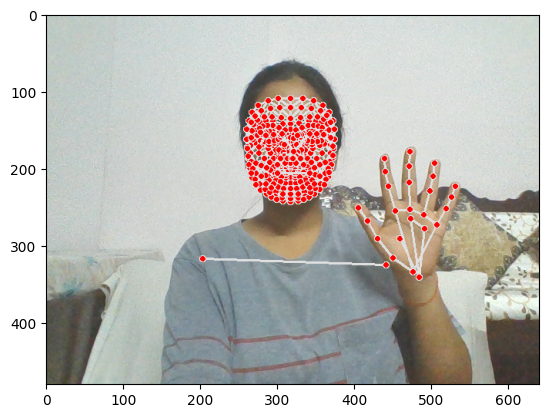

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [17]:
len(results.pose_landmarks.landmark)

33

In [18]:
results.pose_landmarks.landmark[0]

x: 0.5015629529953003
y: 0.3713945150375366
z: -0.5700911283493042
visibility: 0.9999982714653015

In [19]:
results.pose_landmarks.landmark[0].x

0.5015629529953003

In [20]:
results.pose_landmarks.landmark[0].y

0.3713945150375366

In [21]:
results.pose_landmarks.landmark[0].z

-0.5700911283493042

In [22]:
results.pose_landmarks.landmark[0].visibility

0.9999982714653015

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

Another way this can be written is

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])

In [24]:
pose

[array([ 0.50156295,  0.37139452, -0.57009113,  0.99999827]),
 array([ 0.53500915,  0.32368895, -0.51290977,  0.99999648]),
 array([ 0.54928827,  0.32470486, -0.51262736,  0.99999672]),
 array([ 0.56294727,  0.32605061, -0.51206791,  0.99999619]),
 array([ 0.47950229,  0.32455176, -0.52210307,  0.99999601]),
 array([ 0.46248206,  0.32633594, -0.52140665,  0.99999541]),
 array([ 0.44672355,  0.32852507, -0.52166951,  0.99999434]),
 array([ 0.58229661,  0.35698298, -0.2193106 ,  0.99999523]),
 array([ 0.432758  ,  0.35979518, -0.25347587,  0.9999972 ]),
 array([ 0.53485751,  0.42973191, -0.46499664,  0.99999559]),
 array([ 0.46922883,  0.43050843, -0.47680783,  0.99999696]),
 array([ 0.68944412,  0.67720914, -0.08146103,  0.99985069]),
 array([ 0.31790778,  0.66167718, -0.14788124,  0.99917006]),
 array([ 0.82103807,  1.03066623, -0.45712972,  0.88000804]),
 array([ 0.27940881,  1.03826129, -0.10005178,  0.27707404]),
 array([ 0.75640512,  0.71249789, -0.92978716,  0.98977858]),
 array([

In [25]:
len(pose)

33

In [26]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) #as shape of pose is 132 so same the numbers of 132
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) #it is going to be 468 landmark in shape and each landmark has 3 values so 1404
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3) #21 landmarks always and 3 coordinates each (error handling) 
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) #21 landmarks always and 3 coordinates each 

In [27]:
pose

array([ 5.01562953e-01,  3.71394515e-01, -5.70091128e-01,  9.99998271e-01,
        5.35009146e-01,  3.23688954e-01, -5.12909770e-01,  9.99996483e-01,
        5.49288273e-01,  3.24704856e-01, -5.12627363e-01,  9.99996722e-01,
        5.62947273e-01,  3.26050609e-01, -5.12067914e-01,  9.99996185e-01,
        4.79502290e-01,  3.24551761e-01, -5.22103071e-01,  9.99996006e-01,
        4.62482065e-01,  3.26335937e-01, -5.21406651e-01,  9.99995410e-01,
        4.46723551e-01,  3.28525066e-01, -5.21669507e-01,  9.99994338e-01,
        5.82296610e-01,  3.56982976e-01, -2.19310597e-01,  9.99995232e-01,
        4.32758003e-01,  3.59795183e-01, -2.53475875e-01,  9.99997199e-01,
        5.34857512e-01,  4.29731905e-01, -4.64996636e-01,  9.99995589e-01,
        4.69228834e-01,  4.30508435e-01, -4.76807833e-01,  9.99996960e-01,
        6.89444125e-01,  6.77209139e-01, -8.14610273e-02,  9.99850690e-01,
        3.17907780e-01,  6.61677182e-01, -1.47881240e-01,  9.99170065e-01,
        8.21038067e-01,  

In [28]:
face

array([ 0.49572551,  0.4164575 , -0.02578694, ...,  0.55851942,
        0.3188982 ,  0.0155469 ])

In [29]:
lh

array([ 0.74431396,  0.69750082,  0.        ,  0.70333749,  0.6597265 ,
       -0.0123633 ,  0.67206323,  0.60749084, -0.02046372,  0.65269351,
        0.56004554, -0.02994647,  0.63437247,  0.52404773, -0.03974054,
        0.70793152,  0.5315057 , -0.00528638,  0.69473183,  0.46635425,
       -0.01777108,  0.68877476,  0.42680836, -0.02664567,  0.68603152,
        0.3905836 , -0.03321906,  0.73847783,  0.52885902, -0.01301918,
        0.73678786,  0.4561516 , -0.02361869,  0.73707008,  0.41180202,
       -0.03280602,  0.73865944,  0.37204975, -0.04054269,  0.76675683,
        0.5428316 , -0.02403522,  0.77823228,  0.47821361, -0.03782929,
        0.78472483,  0.43864992, -0.04790872,  0.78890246,  0.40265837,
       -0.05489342,  0.79303783,  0.57069129, -0.03706406,  0.81165701,
        0.52555799, -0.04981527,  0.82249188,  0.4952822 , -0.05703798,
        0.83065343,  0.46477011, -0.06203834])

In [30]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [32]:
result_test = extract_keypoints(results)

In [33]:
result_test

array([ 0.50156295,  0.37139452, -0.57009113, ...,  0.        ,
        0.        ,  0.        ])

In [34]:
468*3+33*4+21*3+21*3

1662

In [35]:
extract_keypoints(results).shape

(1662,)

In [36]:
np.save('0', result_test)

In [37]:
np.load('0.npy')

array([ 0.50156295,  0.37139452, -0.57009113, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [38]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('TRIAL_DATA') 

# Actions that we try to detect
actions = np.array(['hello!','sir'])
#actions = np.array(['namaste', 'my', 'name','D','R','I','S','H','T','your','doctor','P','A','E','thankyou','for','evaluating','me','love','all'])
# actions = np.array(['hello!','me','good','evaluating','morning','for','afternoon','thankyou','respected sir'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [39]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [40]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence))) # makethe directories and sub directory 
        except:
            pass
        
# 3 ACTIONS, 30 VIDEOS PER ACTION AND 30 FRAMES PER VIDEOS 

# 5. Collect Keypoint Values for Training and Testing

In [34]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic 
                # we use this as if we originally run this without this logic then it would continuously take the frames without much break
                #if we think why break at all then, having breaks between each sequence 
                  #collection allows you to reset and reposition yourself to collect the action from start to finish.
                    
                if frame_num == 0: # if we are at frame zero we are going to take a break and that break is going to be 2 seconds in length viz waitkey(2000)
                  
                    #------------------ just outputting text on the screen 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    #-------------------
                    
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000) #
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num)) # this is where we will save our frame
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [35]:
cap.release() 
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
#!pip install keras.utils --user

In [43]:
#!pip install numpy --upgrade

In [44]:
# !pip install keras==2.12.0 --user

In [45]:
#from tensorflow import keras

In [46]:
#!pip install keras

In [47]:
#import loggingsetup # pylint: disable=unused-import

In [48]:
#from keras.utils.np_utils import to_categorical

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
#from tensorflow.python.util.tf_export import keras_export

In [51]:
#  @keras_export("keras.utils.to_categorical")
#from tensorflow.keras.utils import to_categorical

In [52]:
#!pip install tensorflow 2.12.0 --user

In [53]:
# label dic to label each one of differetn actions.
label_map = {label:num for num, label in enumerate(actions)}

In [54]:
label_map

{'hello!': 0, 'sir': 1}

In [55]:
# structures all the sequence and make it into a big array with all the data combined
sequences, labels = [], [] # creating two blank arrays, sequnce being the x data and label being the y data
for action in actions:
    for sequence in range(no_sequences):
        window = [] # all of the different frames we got for that particular sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window) 
        labels.append(label_map[action])

In [56]:
np.array(sequences).shape

(60, 30, 1662)

In [57]:
np.array(labels).shape

(60,)

In [58]:
X = np.array(sequences)

In [59]:
X.shape

(60, 30, 1662)

In [60]:
y = to_categorical(labels).astype(int)
# one hot encoder representation conversion using to_categorical 
# like if we had only 3 actions like hello, thankyou, ilove 
# then for hello it will be [1,0,0]
# for thankyou it will be [0,1,0]
# for i loveyou it will be [0,0,1]

In [61]:
# import pandas as pd

In [62]:
# y1 = pd.get_dummies(labels).astype(int)

In [63]:
# y1

In [64]:
# type(y1)

In [65]:
# y = y1.to_numpy()

In [66]:
# type(y)

In [67]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
# test size is 5 percent of the data 

In [69]:
y_test.shape

(3, 2)

# 7. Build and Train LSTM Neural Network

In [70]:
# !pip install --upgrade --force-reinstall tensorflow==2.12.0 --user

In [71]:
# !pip install --upgrade --force-reinstall numpy==1.22 --user

In [72]:
# !pip install --upgrade --force-reinstall keras==2.12 --user

In [73]:
# !pip install numpy --upgrade --user

In [74]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [75]:
from tensorflow.keras.models import Sequential
# # allow us to make the sequential neural network  

In [76]:
from tensorflow.keras.layers import LSTM, Dense # LSTM:- temporal component to buold our own neural network and do the action detection , Dense:- normal fully connected layer

In [77]:
from tensorflow.keras.callbacks import TensorBoard # keep tracks of our model as it is training and make logs

In [78]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir) 
# web app part of the tensorflow tomonitor out neural network training
# keep track of the accuracy while its training 

In [79]:
X.shape

(60, 30, 1662)

In [80]:
#!pip install numpy==1.19.5

In [81]:
# model = Sequential()

In [82]:
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# #  was added after the relu 

In [83]:

# # instantiating the model, just make the model and keep adding the layers into it.

# #---------------------------

# # here we need 64 LSTM layers/units fully connected
# # return_sequnces is true, means if we are going to stack the layers together we need to return the sequnces cause the next layer is going to need those
# # input shape is the value same as X.shape last two elements like if we had [90,30,1662] so the input shape is [30,1662]
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# # here the return_sequnces is false as the next layer is dense layer so we dont have to return the sequnces
# #----------------------------


# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax')) # softmax will return the probability of answer from 0 to 1 with the sum of all thevalues adding up to one

In [84]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [85]:
#res = [.7, 0.2, 0.1]

In [86]:
#actions[np.argmax(res)]

In [87]:
# compiled model 
# we are doing multi class classification model so we are going with that loss function

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [88]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6862 - categorical_accuracy: 0.6250WARNING:tensorflow:From C:\Users\KIIT\Anaconda\envs\gputest\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2/2 [==============================] - 0s 158ms/step - loss: 2.2463 - categorical_accuracy: 0.4912
Epoch 2/2000
2/2 [==============================] - 0s 37ms/step - loss: 1.4066 - categorical_accuracy: 0.4912
Epoch 3/2000
2/2 [==============================] - 0s 34ms/step - loss: 2.3773 - categorical_accuracy: 0.4561
Epoch 4/2000
2/2 [==============================] - 0s 34ms/step - loss: 23.0070 - categorical_accuracy: 0.3860
Epoch 5/2000
2/2 [==============================] - 0s 34ms/step - loss: 43.9324 - categorical_accuracy: 0.5439
Epoch 6/2000
2/2 [==============================] - 0s 34

2/2 [==============================] - 0s 51ms/step - loss: 87.2445 - categorical_accuracy: 0.5088
Epoch 68/2000
2/2 [==============================] - 0s 53ms/step - loss: 89.4591 - categorical_accuracy: 0.3509
Epoch 69/2000
2/2 [==============================] - 0s 55ms/step - loss: 109.5896 - categorical_accuracy: 0.4912
Epoch 70/2000
2/2 [==============================] - 0s 49ms/step - loss: 53.1560 - categorical_accuracy: 0.5789
Epoch 71/2000
2/2 [==============================] - 0s 52ms/step - loss: 137.8757 - categorical_accuracy: 0.4561
Epoch 72/2000
2/2 [==============================] - 0s 63ms/step - loss: 76.0687 - categorical_accuracy: 0.4737
Epoch 73/2000
2/2 [==============================] - 0s 60ms/step - loss: 33.3880 - categorical_accuracy: 0.5439
Epoch 74/2000
2/2 [==============================] - 0s 60ms/step - loss: 69.4249 - categorical_accuracy: 0.3860
Epoch 75/2000
2/2 [==============================] - 0s 57ms/step - loss: 112.7258 - categorical_accuracy: 0

2/2 [==============================] - 0s 53ms/step - loss: 2.1223 - categorical_accuracy: 0.5088
Epoch 140/2000
2/2 [==============================] - 0s 53ms/step - loss: 3.3515 - categorical_accuracy: 0.4912
Epoch 141/2000
2/2 [==============================] - 0s 53ms/step - loss: 2.2903 - categorical_accuracy: 0.7018
Epoch 142/2000
2/2 [==============================] - 0s 76ms/step - loss: 2.2888 - categorical_accuracy: 0.6842
Epoch 143/2000
2/2 [==============================] - 0s 63ms/step - loss: 2.0323 - categorical_accuracy: 0.5088
Epoch 144/2000
2/2 [==============================] - 0s 69ms/step - loss: 2.3946 - categorical_accuracy: 0.5088
Epoch 145/2000
2/2 [==============================] - 0s 63ms/step - loss: 2.3243 - categorical_accuracy: 0.4912
Epoch 146/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.2633 - categorical_accuracy: 0.6140
Epoch 147/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.7544 - categorical_accuracy: 0.701

2/2 [==============================] - 0s 58ms/step - loss: 0.3441 - categorical_accuracy: 0.8947
Epoch 212/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.3255 - categorical_accuracy: 0.7544
Epoch 213/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.5499 - categorical_accuracy: 0.8421
Epoch 214/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.3871 - categorical_accuracy: 0.6842
Epoch 215/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4012 - categorical_accuracy: 0.9123
Epoch 216/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3085 - categorical_accuracy: 0.8772
Epoch 217/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4342 - categorical_accuracy: 0.8947
Epoch 218/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2397 - categorical_accuracy: 0.9298
Epoch 219/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3688 - categorical_accuracy: 0.894

2/2 [==============================] - 0s 52ms/step - loss: 0.2005 - categorical_accuracy: 0.9298
Epoch 284/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.2635 - categorical_accuracy: 0.9123
Epoch 285/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2961 - categorical_accuracy: 0.9123
Epoch 286/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.3772 - categorical_accuracy: 0.7719
Epoch 287/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3384 - categorical_accuracy: 0.9123
Epoch 288/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2586 - categorical_accuracy: 0.9474
Epoch 289/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.2924 - categorical_accuracy: 0.8947
Epoch 290/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.3067 - categorical_accuracy: 0.9123
Epoch 291/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.2492 - categorical_accuracy: 0.912

2/2 [==============================] - 0s 53ms/step - loss: 0.3886 - categorical_accuracy: 0.7544
Epoch 356/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.3624 - categorical_accuracy: 0.8947
Epoch 357/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.3898 - categorical_accuracy: 0.9298
Epoch 358/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.2675 - categorical_accuracy: 0.9123
Epoch 359/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3576 - categorical_accuracy: 0.9123
Epoch 360/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.3379 - categorical_accuracy: 0.8947
Epoch 361/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3160 - categorical_accuracy: 0.9298
Epoch 362/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3658 - categorical_accuracy: 0.9123
Epoch 363/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.2345 - categorical_accuracy: 0.912

2/2 [==============================] - 0s 54ms/step - loss: 1.7520 - categorical_accuracy: 0.6491
Epoch 428/2000
2/2 [==============================] - 0s 55ms/step - loss: 1.5495 - categorical_accuracy: 0.6316
Epoch 429/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.5952 - categorical_accuracy: 0.9123
Epoch 430/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.4021 - categorical_accuracy: 0.8947
Epoch 431/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.4502 - categorical_accuracy: 0.9123
Epoch 432/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2879 - categorical_accuracy: 0.8596
Epoch 433/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4380 - categorical_accuracy: 0.8596
Epoch 434/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.3255 - categorical_accuracy: 0.9123
Epoch 435/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2694 - categorical_accuracy: 0.894

2/2 [==============================] - 0s 58ms/step - loss: 0.2980 - categorical_accuracy: 0.8772
Epoch 500/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.3586 - categorical_accuracy: 0.9123
Epoch 501/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.3587 - categorical_accuracy: 0.9123
Epoch 502/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.3672 - categorical_accuracy: 0.8772
Epoch 503/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2829 - categorical_accuracy: 0.9298
Epoch 504/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.3162 - categorical_accuracy: 0.8947
Epoch 505/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.2867 - categorical_accuracy: 0.9474
Epoch 506/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3691 - categorical_accuracy: 0.9123
Epoch 507/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.2579 - categorical_accuracy: 0.894

2/2 [==============================] - 0s 51ms/step - loss: 0.1570 - categorical_accuracy: 0.9474
Epoch 572/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.1507 - categorical_accuracy: 0.9474
Epoch 573/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.1613 - categorical_accuracy: 0.9474
Epoch 574/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.1454 - categorical_accuracy: 0.9474
Epoch 575/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.1541 - categorical_accuracy: 0.9474
Epoch 576/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.1827 - categorical_accuracy: 0.9474
Epoch 577/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2446 - categorical_accuracy: 0.9123
Epoch 578/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2827 - categorical_accuracy: 0.9298
Epoch 579/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.1359 - categorical_accuracy: 0.947

2/2 [==============================] - 0s 55ms/step - loss: 0.3318 - categorical_accuracy: 0.9298
Epoch 644/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.1675 - categorical_accuracy: 0.9298
Epoch 645/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.1846 - categorical_accuracy: 0.8947
Epoch 646/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.2541 - categorical_accuracy: 0.9298
Epoch 647/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.1242 - categorical_accuracy: 0.9474
Epoch 648/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.1748 - categorical_accuracy: 0.9649
Epoch 649/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.1479 - categorical_accuracy: 0.9474
Epoch 650/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.1353 - categorical_accuracy: 0.9474
Epoch 651/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2011 - categorical_accuracy: 0.947

2/2 [==============================] - 0s 50ms/step - loss: 2.7012 - categorical_accuracy: 0.5263
Epoch 716/2000
2/2 [==============================] - 0s 53ms/step - loss: 2.4030 - categorical_accuracy: 0.4386
Epoch 717/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.8763 - categorical_accuracy: 0.5088
Epoch 718/2000
2/2 [==============================] - 0s 56ms/step - loss: 3.9400 - categorical_accuracy: 0.4912
Epoch 719/2000
2/2 [==============================] - 0s 56ms/step - loss: 1.6659 - categorical_accuracy: 0.5789
Epoch 720/2000
2/2 [==============================] - 0s 55ms/step - loss: 2.7955 - categorical_accuracy: 0.5088
Epoch 721/2000
2/2 [==============================] - 0s 53ms/step - loss: 4.4076 - categorical_accuracy: 0.4912
Epoch 722/2000
2/2 [==============================] - 0s 56ms/step - loss: 2.9917 - categorical_accuracy: 0.4912
Epoch 723/2000
2/2 [==============================] - 0s 56ms/step - loss: 5.2330 - categorical_accuracy: 0.508

2/2 [==============================] - 0s 52ms/step - loss: 1.1325 - categorical_accuracy: 0.5088
Epoch 788/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.9251 - categorical_accuracy: 0.5614
Epoch 789/2000
2/2 [==============================] - 0s 60ms/step - loss: 1.1509 - categorical_accuracy: 0.4912
Epoch 790/2000
2/2 [==============================] - 0s 64ms/step - loss: 1.2739 - categorical_accuracy: 0.5088
Epoch 791/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.0040 - categorical_accuracy: 0.4737
Epoch 792/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.8357 - categorical_accuracy: 0.7544
Epoch 793/2000
2/2 [==============================] - 0s 61ms/step - loss: 1.2313 - categorical_accuracy: 0.3860
Epoch 794/2000
2/2 [==============================] - 0s 50ms/step - loss: 1.1935 - categorical_accuracy: 0.4386
Epoch 795/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.9493 - categorical_accuracy: 0.526

2/2 [==============================] - 0s 56ms/step - loss: 0.7084 - categorical_accuracy: 0.4912
Epoch 860/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.8030 - categorical_accuracy: 0.6842
Epoch 861/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.7036 - categorical_accuracy: 0.4912
Epoch 862/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.9876 - categorical_accuracy: 0.5088
Epoch 863/2000
2/2 [==============================] - 0s 60ms/step - loss: 1.1091 - categorical_accuracy: 0.4912
Epoch 864/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.8885 - categorical_accuracy: 0.5088
Epoch 865/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.9249 - categorical_accuracy: 0.4912
Epoch 866/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.9449 - categorical_accuracy: 0.5088
Epoch 867/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.9905 - categorical_accuracy: 0.491

2/2 [==============================] - 0s 52ms/step - loss: 0.7269 - categorical_accuracy: 0.5439
Epoch 932/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.9499 - categorical_accuracy: 0.3860
Epoch 933/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.6016 - categorical_accuracy: 0.7193
Epoch 934/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.8105 - categorical_accuracy: 0.3860
Epoch 935/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.7280 - categorical_accuracy: 0.7368
Epoch 936/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.6746 - categorical_accuracy: 0.4912
Epoch 937/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.6301 - categorical_accuracy: 0.5088
Epoch 938/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.6200 - categorical_accuracy: 0.6316
Epoch 939/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.6084 - categorical_accuracy: 0.666

2/2 [==============================] - 0s 59ms/step - loss: 0.5700 - categorical_accuracy: 0.5965
Epoch 1004/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.5964 - categorical_accuracy: 0.7018
Epoch 1005/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.5793 - categorical_accuracy: 0.5614
Epoch 1006/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.6601 - categorical_accuracy: 0.5263
Epoch 1007/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.6935 - categorical_accuracy: 0.4912
Epoch 1008/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.6464 - categorical_accuracy: 0.5263
Epoch 1009/2000
2/2 [==============================] - 0s 92ms/step - loss: 0.6923 - categorical_accuracy: 0.4912
Epoch 1010/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.6384 - categorical_accuracy: 0.5263
Epoch 1011/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.6717 - categorical_accurac

2/2 [==============================] - 0s 52ms/step - loss: 0.5818 - categorical_accuracy: 0.6140
Epoch 1076/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.5690 - categorical_accuracy: 0.6667
Epoch 1077/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.5557 - categorical_accuracy: 0.6842
Epoch 1078/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.6018 - categorical_accuracy: 0.6667
Epoch 1079/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.5888 - categorical_accuracy: 0.6491
Epoch 1080/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.5730 - categorical_accuracy: 0.6140
Epoch 1081/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.5303 - categorical_accuracy: 0.7544
Epoch 1082/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.5480 - categorical_accuracy: 0.8070
Epoch 1083/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.5278 - categorical_accurac

2/2 [==============================] - 0s 56ms/step - loss: 0.5522 - categorical_accuracy: 0.7018
Epoch 1148/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.5520 - categorical_accuracy: 0.6667
Epoch 1149/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.5104 - categorical_accuracy: 0.7368
Epoch 1150/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.8014 - categorical_accuracy: 0.2982
Epoch 1151/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.6042 - categorical_accuracy: 0.5088
Epoch 1152/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.5235 - categorical_accuracy: 0.7018
Epoch 1153/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.5304 - categorical_accuracy: 0.6140
Epoch 1154/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.6257 - categorical_accuracy: 0.5088
Epoch 1155/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.0591 - categorical_accurac

2/2 [==============================] - 0s 62ms/step - loss: 0.8740 - categorical_accuracy: 0.5088
Epoch 1220/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.7372 - categorical_accuracy: 0.4912
Epoch 1221/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.4903 - categorical_accuracy: 0.7368
Epoch 1222/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.5171 - categorical_accuracy: 0.6842
Epoch 1223/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.5170 - categorical_accuracy: 0.6667
Epoch 1224/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.4442 - categorical_accuracy: 0.9298
Epoch 1225/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.4408 - categorical_accuracy: 0.9649
Epoch 1226/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4417 - categorical_accuracy: 0.9298
Epoch 1227/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.4579 - categorical_accurac

2/2 [==============================] - 0s 51ms/step - loss: 0.5167 - categorical_accuracy: 0.6140
Epoch 1292/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.4591 - categorical_accuracy: 0.8772
Epoch 1293/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.4382 - categorical_accuracy: 0.9298
Epoch 1294/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.4235 - categorical_accuracy: 0.9474
Epoch 1295/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.4163 - categorical_accuracy: 0.9298
Epoch 1296/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.4218 - categorical_accuracy: 0.9649
Epoch 1297/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.4281 - categorical_accuracy: 0.9649
Epoch 1298/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.4287 - categorical_accuracy: 0.9474
Epoch 1299/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4360 - categorical_accurac

2/2 [==============================] - 0s 52ms/step - loss: 0.4384 - categorical_accuracy: 0.7895
Epoch 1364/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.6061 - categorical_accuracy: 0.6842
Epoch 1365/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.5109 - categorical_accuracy: 0.6842
Epoch 1366/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.6883 - categorical_accuracy: 0.6842
Epoch 1367/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.7614 - categorical_accuracy: 0.6140
Epoch 1368/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.4064 - categorical_accuracy: 0.9298
Epoch 1369/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.5342 - categorical_accuracy: 0.6491
Epoch 1370/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.6266 - categorical_accuracy: 0.7018
Epoch 1371/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.5015 - categorical_accurac

2/2 [==============================] - 0s 55ms/step - loss: 0.3851 - categorical_accuracy: 0.9298
Epoch 1436/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3580 - categorical_accuracy: 0.9298
Epoch 1437/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3738 - categorical_accuracy: 0.9474
Epoch 1438/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.3883 - categorical_accuracy: 0.8596
Epoch 1439/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.3639 - categorical_accuracy: 0.9298
Epoch 1440/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.3884 - categorical_accuracy: 0.8596
Epoch 1441/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.3779 - categorical_accuracy: 0.9298
Epoch 1442/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.4456 - categorical_accuracy: 0.7719
Epoch 1443/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.4266 - categorical_accurac

2/2 [==============================] - 0s 53ms/step - loss: 0.3311 - categorical_accuracy: 0.9123
Epoch 1508/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.3968 - categorical_accuracy: 0.7895
Epoch 1509/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.5419 - categorical_accuracy: 0.7018
Epoch 1510/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.8241 - categorical_accuracy: 0.5439
Epoch 1511/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.8925 - categorical_accuracy: 0.5088
Epoch 1512/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.0906 - categorical_accuracy: 0.4912
Epoch 1513/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.9826 - categorical_accuracy: 0.5088
Epoch 1514/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.7146 - categorical_accuracy: 0.5088
Epoch 1515/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.7633 - categorical_accurac

2/2 [==============================] - 0s 57ms/step - loss: 0.3481 - categorical_accuracy: 0.9298
Epoch 1580/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.4343 - categorical_accuracy: 0.7544
Epoch 1581/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.5156 - categorical_accuracy: 0.7018
Epoch 1582/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.5281 - categorical_accuracy: 0.6316
Epoch 1583/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.6153 - categorical_accuracy: 0.6491
Epoch 1584/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.5208 - categorical_accuracy: 0.6491
Epoch 1585/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.8077 - categorical_accuracy: 0.4912
Epoch 1586/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.2709 - categorical_accuracy: 0.5088
Epoch 1587/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.3506 - categorical_accurac

2/2 [==============================] - 0s 58ms/step - loss: 0.5124 - categorical_accuracy: 0.7368
Epoch 1652/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4242 - categorical_accuracy: 0.7193
Epoch 1653/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.3702 - categorical_accuracy: 0.8947
Epoch 1654/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.3067 - categorical_accuracy: 0.9298
Epoch 1655/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3368 - categorical_accuracy: 0.9298
Epoch 1656/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.3790 - categorical_accuracy: 0.8421
Epoch 1657/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3707 - categorical_accuracy: 0.8246
Epoch 1658/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3094 - categorical_accuracy: 0.9123
Epoch 1659/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2853 - categorical_accurac

2/2 [==============================] - 0s 52ms/step - loss: 0.3648 - categorical_accuracy: 0.8596
Epoch 1724/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.3057 - categorical_accuracy: 0.8772
Epoch 1725/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.4611 - categorical_accuracy: 0.7368
Epoch 1726/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.4857 - categorical_accuracy: 0.5965
Epoch 1727/2000
2/2 [==============================] - 0s 52ms/step - loss: 1.0462 - categorical_accuracy: 0.4912
Epoch 1728/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.0316 - categorical_accuracy: 0.5088
Epoch 1729/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.7146 - categorical_accuracy: 0.5965
Epoch 1730/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.5947 - categorical_accuracy: 0.7368
Epoch 1731/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.4011 - categorical_accurac

2/2 [==============================] - 0s 60ms/step - loss: 0.3441 - categorical_accuracy: 0.8421
Epoch 1796/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.3562 - categorical_accuracy: 0.8596
Epoch 1797/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.3874 - categorical_accuracy: 0.7544
Epoch 1798/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.3359 - categorical_accuracy: 0.8772
Epoch 1799/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.3079 - categorical_accuracy: 0.9474
Epoch 1800/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.2859 - categorical_accuracy: 0.9298
Epoch 1801/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.2444 - categorical_accuracy: 0.9298
Epoch 1802/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.2603 - categorical_accuracy: 0.9474
Epoch 1803/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2429 - categorical_accurac

2/2 [==============================] - 0s 55ms/step - loss: 1.3391 - categorical_accuracy: 0.4912
Epoch 1868/2000
2/2 [==============================] - 0s 51ms/step - loss: 1.1793 - categorical_accuracy: 0.5088
Epoch 1869/2000
2/2 [==============================] - 0s 51ms/step - loss: 1.2152 - categorical_accuracy: 0.4912
Epoch 1870/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.8030 - categorical_accuracy: 0.7368
Epoch 1871/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.6666 - categorical_accuracy: 0.7018
Epoch 1872/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.5926 - categorical_accuracy: 0.7895
Epoch 1873/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.5994 - categorical_accuracy: 0.7368
Epoch 1874/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.5743 - categorical_accuracy: 0.7368
Epoch 1875/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.4808 - categorical_accurac

2/2 [==============================] - 0s 52ms/step - loss: 0.2381 - categorical_accuracy: 0.9298
Epoch 1940/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.2148 - categorical_accuracy: 0.9649
Epoch 1941/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.2137 - categorical_accuracy: 0.9474
Epoch 1942/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2440 - categorical_accuracy: 0.9649
Epoch 1943/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.2358 - categorical_accuracy: 0.9298
Epoch 1944/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2264 - categorical_accuracy: 0.9649
Epoch 1945/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.2141 - categorical_accuracy: 0.9649
Epoch 1946/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.2085 - categorical_accuracy: 0.9649
Epoch 1947/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.2067 - categorical_accurac

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 596,642
Trainable params: 596,642
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [90]:
res = model.predict(X_test)

In [92]:
actions[np.argmax(res[0])]

'hello!'

In [93]:
actions[np.argmax(y_test[0])]

'hello!'

# 9. Save Weights

In [94]:
model.save('action.h5')

In [95]:
# del model

In [96]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [97]:
# multilabel_confusion_matrix is going to give us confusion matrix for each of the labelas and this allows us to evaluate as what is detected as true positive and true negative and false negative and false negative 
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [98]:
yhat = model.predict(X_test)

In [99]:
# doing these steps below converts the predictions from their
# one hot encoded represnetation to a categorical label, that is 0,1,2 as opposed to [1,0,0], [0,1,0] and [0,0,1]
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [100]:
multilabel_confusion_matrix(ytrue, yhat)
# all the numbers should be in the top let hand corner or bottom right hand corner
# as [[TRUE N, FLASE P],
#     [FALSE N, TRUE P]]
# so if this is the case then the model is performing really well

array([[[1, 0],
        [0, 2]],

       [[2, 0],
        [0, 1]]], dtype=int64)

In [101]:
accuracy_score(ytrue, yhat) # 100 percent accuracy is 1.0

1.0

# 11. Test in Real Time

In [102]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res): # putting in dynamic rectangle
        # (0,60+num*40) moves the bar dynamically, (int(prob*100)) will hange the length of the bar depending on our probability
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [103]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

# this shows the probabilty of words in the real time 

In [104]:
# sequence.reverse()

In [105]:
# len(sequence)

In [106]:
# sequence.append('def')

In [107]:
# sequence.reverse()

In [108]:
# sequence[-30:]

In [109]:

#1. New detection variables
sequence = [] # collect our 30 frames in order to generate our predictions
sentence = [] # allows us to concatinate a history of detection together 
threshold = 0.8 # this is like a confidence matrix, see if our resukt is above a certain threshold 


cap = cv2.VideoCapture(0)
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:] # grab last 30 frames
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0] # np.expand_dims aloows us to pass from one sequnce
            print(actions[np.argmax(res)]) # 
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: # to check whether our result is above the threshold 
                if len(sentence) > 0:  # if length of the sentence is greater than zero
                    if actions[np.argmax(res)] != sentence[-1]: # the current action does not equal to the last sentence in our string
                        sentence.append(actions[np.argmax(res)]) # append the current detected action on to our sentence array 
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:] # end up with last five values so we dont end up with giant array 

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            # little bit of rendeering 
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1) # how our rectangle will look
        cv2.putText(image, ' '.join(sentence), (3,30),  
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<clas

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<clas

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.py

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python

<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hell

hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.S

hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutputs'>
sir
<class 'mediapipe.python.solution_base.SolutionOutp

hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello!
<class 'mediapipe.python.solution

In [125]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.8

# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

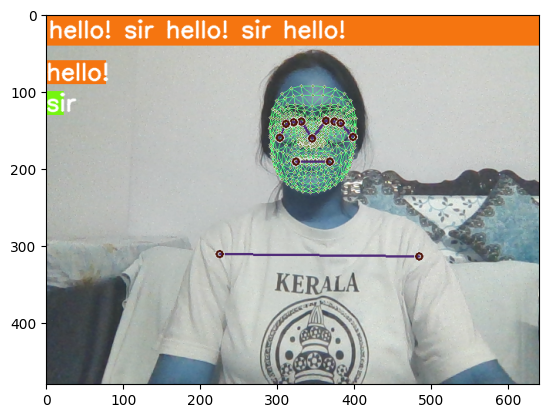

In [110]:
plt.imshow(prob_viz(res, actions, image, colors))

In [105]:
cap.release()
cv2.destroyAllWindows()

In [247]:
# res[np.argmax(res)] > threshold

True

In [ ]:
#(num_sequences,30,1662)

In [240]:
# model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)